# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project description
Analyzing data related to insults found in social commentary to provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions. 

This will be achieved through many methods such as:
- Text pre-processing
- Sentiment analysis

### 1.2 Project objectives
- To provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions.
- To classify into insults and not insults
- To conduct a basic frequency analysis to identify the most common insults used in social commentary. This can help pinpoint which insults are more prevalent.

## 2. Data Understanding

### 2.1. Importing the data

In [7]:

import pandas as pd

df = pd.read_csv('../data/train.csv')

### 2.2. Data exploration

In [8]:
df.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


### 2.2.1 Columns description

- insults: two possible outputs (0, 1). 0 means no insults, 1 means it contains insults (based on the presence of insult words, not accurate)
- date: the date of the comment
- comment: the comment being analyzed

0    2898
1    1049
Name: Insult, dtype: int64


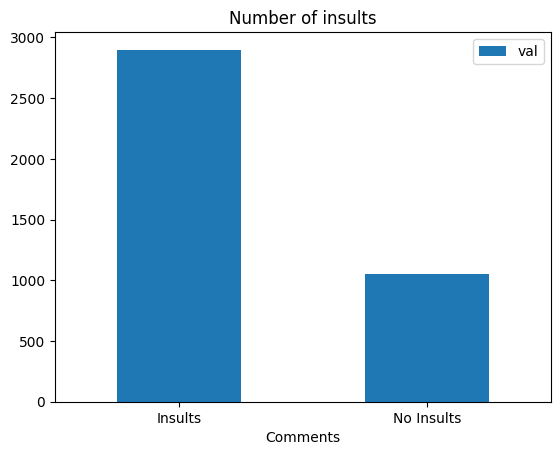

In [2]:
num = df['Insult'].value_counts()

print(num)

plot = pd.DataFrame({'Comments':['Insults', 'No Insults'], 'val':[num[0], num[1]]})
ax = plot.plot.bar(title='Number of insults',x='Comments', y='val', rot=0)

## 3. Data preparation and pre-processing

### 3.1. Data cleaning

#### Clean the data, only show data with insults

In [3]:
global bad_dict
badfile = open('../misc/insults.txt')
bad_dict = dict()
for line in badfile:
    bw = line.split(',')
    if len(bw) == 2:
        bad_dict[bw[0]] = bw[1].strip()

filtered_df = df[df['Comment'].str.contains("insults", case=False)]

filtered_df.head()

,Insult,Date,Comment
277,1,20120529025307Z,"""haha...atleast get your insults straight you ..."
1271,0,NaN,"""All that hatred inside of you must have eaten..."
2528,0,20120529100821Z,"""Yep, it's pretty std with liberals. \xa0When ..."
2764,0,20120620045051Z,"""joseywhales, thank you kindly for proving my ..."
3239,0,20120529034620Z,"""I don't know what the insults are for,\nI tho..."


### 3.2. Data visualization

#### Visualise the data in a wordcloud

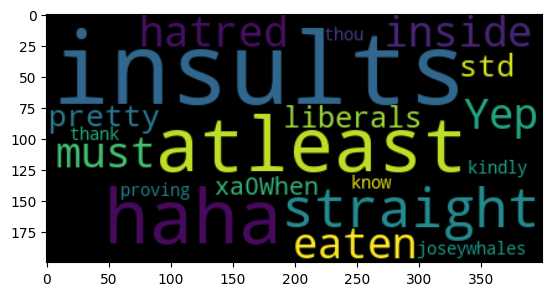

In [6]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

text = filtered_df['Comment'].to_string(index=False)
processed_text = re.sub(r'\bxa0\b', '', text)

wordcloud = WordCloud(max_words=25, min_word_length=3).generate(processed_text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

c:\Users\yahbo\.conda\envs\Torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: >

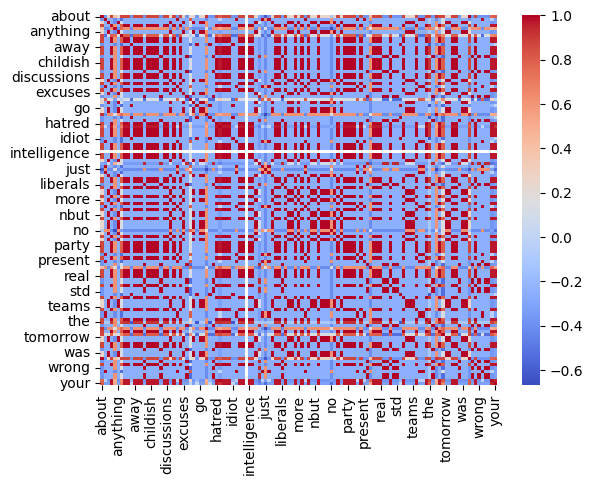

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Create a document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(filtered_df['Comment'])
vocab = vectorizer.get_feature_names()
df = pd.DataFrame(dtm.toarray(), columns=vocab)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

### 3.3 Data reduction

### 3.4 Data transformation

### 3.4. Feature selection

## 4. Modeling